Michael Uftring   
Indiana University   
Network Science, Spring 2018   
Week#5 Assignment - Scale-free networks

# Assignment: Scale-free networks

## 1. Implement BA algorithm
For this assignment you will be implementing the BA algorithm from the reading (see [Barabasi Ch 5.3](http://barabasi.com/networksciencebook/)). Create a function that takes `n` the number of nodes for the graph, and `m_o` the initial number of nodes, as arguments and returns a networkx graph with a scale-free degree distribution.

The first step is figuring out how to do "preferential attachment" based on the degree of existing nodes. A brute-force way to do this is creating a huge list with duplicated items. Say, node 1's degree is 6, node 2's degree is 3, and node 3's degree is 2. (I know, I know. This is not a 'graphical' sequence. But for the sake of simplicity let's just assume that.) Then, we can create the following list to *preferentially sample* nodes from the network. 

In [1]:
alist = [1,1,1,1,1,1,2,2,2,3,3]

1 is repeated 6 times, 2 is repeated 3 times, and so on. Now if we randomly sample from this list, we will be three times more like to sample node 1 than node 3!

In [7]:
import random

random.sample(alist, 1)

[1]

So, if you can maintain this list for your network, you can implement preferential attachment. Simply update this list whenever you add an edge! 

An alternative way is using `numpy`'s sampling method. If you run the following cell, the documentation for the [`np.random.choice`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.choice.html) function will appear at the bottom. 

In [8]:
import numpy as np

np.random.choice?

### exploring `numpy.random.choice()`

```
choice(a, size=None, replace=True, p=None)

Generates a random sample from a given 1-D array

        .. versionadded:: 1.7.0

Parameters
-----------
a : 1-D array-like or int
    If an ndarray, a random sample is generated from its elements.
    If an int, the random sample is generated as if a were np.arange(a)
size : int or tuple of ints, optional
    Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
    ``m * n * k`` samples are drawn.  Default is None, in which case a
    single value is returned.
replace : boolean, optional
    Whether the sample is with or without replacement
p : 1-D array-like, optional
    The probabilities associated with each entry in a.
    If not given the sample assumes a uniform distribution over all
    entries in a.

Returns
--------
samples : single item or ndarray
    The generated random samples
```

In [9]:
np.random.choice(5)

2

In [10]:
np.random.choice([0,1,2,3,4,5,6,7,8,9])

4

In [11]:
np.random.choice([0,1,2,3,4,5,6,7,8,9], 2)

array([9, 8])

In [12]:
np.random.choice([0,1,2,3,4,5,6,7,8,9], [2,2])

array([[2, 7],
       [7, 3]])

In [13]:
np.random.choice([0,1,2,3,4,5,6,7,8,9], [3,3], replace=False)

array([[1, 2, 9],
       [0, 4, 8],
       [3, 7, 5]])

It accepts `p` parameter and you can specifies the probability of each item in the list! So instead of creating

In [14]:
alist = [1,1,1,1,1,1,2,2,2,3,3]

You can do

In [15]:
nodes = [1,2,3]
degrees = [6,3,2]
sum_degrees = sum(degrees)
node_probs = [x*1.0/sum_degrees for x in degrees]  # *1.0 is not really necessary for python3
node_probs

[0.5454545454545454, 0.2727272727272727, 0.18181818181818182]

In [16]:
np.random.choice(nodes, p=node_probs)

2

or sample two nodes from the list. 

In [17]:
np.random.choice(nodes, 2, replace=False, p=node_probs)

array([1, 2])

Now you're ready to implement the BA algorithm! If it's difficult, start with m=1. This is much simpler. Then generalizing to m!=1 is not that complicated. 

In [61]:
import networkx as nx

'''
barabasi_albert_graph(n, m=1):
    a function that takes `n` the number of nodes for the graph, 
    and `m` the initial number of nodes, as arguments and returns a networkx 
    graph with a scale-free degree distribution.
'''
def barabasi_albert_graph(n, m=1):
    # create a complete graph with m initial nodes. 
    # (note: we could use nx.complete_graph() here, but opt to do the creation manually
    # to keep the `type` of the graph created as Graph instead of Complete Graph)
    g = nx.Graph()
    for i in range(m):
        g.add_node(i)
        for j in range(i+1,m):
            g.add_edge(i,j)
    
    # while network has less than n nodes, 
    for i in range(m, n):
        # 1. preferentially sample m nodes from the network,
        nodes = g.nodes()
        degrees = list(g.degree().values())
        sum_degrees = sum(degrees)
        node_probs = [x*1.0/sum_degrees for x in degrees]
        selected = np.random.choice(nodes, size=m, replace=False, p = node_probs)
        # 2. create a new node, 
        g.add_node(i)
        # 3. and connect the new node to the m selected nodes.
        for s in selected:
            g.add_edge(i, s)
    
    return g

## 2. BA graph analysis
Test your algorithm by creating a graph with `N = 1200` and `m_o = 7`. Calculate (and print) the average shortest path length of the graph:

In [84]:
N = 1200
m_o = 7
G = barabasi_albert_graph(N, m_o)

In [89]:
print("The average shortest path length is {0:.3f}.".format(nx.average_shortest_path_length(G)))

The average shortest path length is 2.780.


Calculate (and print) the average clustering coefficient of the graph:

In [90]:
print("The average clustering coefficient is {0:.3f}".format(nx.average_clustering(G)))

The average clustering coefficient is 0.046


Now plot a histogram of the degree distribution of the graph (remember to include `%matplotlib inline` for plotting in Jupyter):

In [91]:
import matplotlib.pyplot as plt
%matplotlib inline

In [109]:
degrees = sorted(G.degree().values())

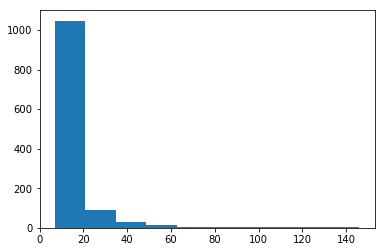

In [111]:
(v, e, p) = plt.hist(degrees)

## 3. BA and ER comparison
Now lets compare the scale-free and random graphs. Create a random graph with the same number of nodes and about the same number of edges, then calculate the average shortest path length of that graph:

In [122]:
def averageDegree(G):
    return sum(G.degree().values())/len(G.nodes())

In [113]:
def probabilityForDegree(N, k):
    return k/(N-1)

In [124]:
k = averageDegree(G)
p = probabilityForDegree(N, k)
R = nx.erdos_renyi_graph(N, p)

Calculate (and print) the average clustering coefficient of the graph:

In [126]:
print("The average shortest path length is {0:.3f}.".format(nx.average_shortest_path_length(R)))
print("The average clustering coefficient is {0:.3f}".format(nx.average_clustering(R)))

The average shortest path length is 2.938.
The average clustering coefficient is 0.012


Now plot a histogram of the degree distribution of the random graph:

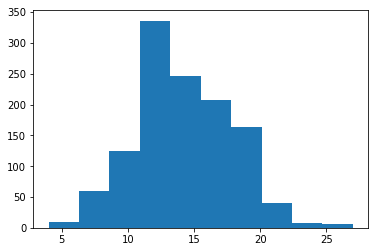

In [127]:
degrees = sorted(R.degree().values())
(v, e, p) = plt.hist(degrees)

How do the average shortest path lengths, average clustering coefficients, and degree distributions between the graphs compare?

Answer:

The table below summarizes the average Shortest Path Length and Clustering Coefficient values.

| Graph Type      | Average Shortest Path Length | Average Clustering Coefficient |
| --------------- | ---------------------------- | ------------------------------ |
| Barabasi-Albert | 2.780                        | 0.046                          |
| Erdos-Renyi     | 2.938                        | 0.012                          |

The two graph types have comparable *Average Shortest Path Length*. The Barabasi-Albert model has an *Average Clustering Coefficient* that is almost 4x that of the Erdos-Renyi model. This suggests that there is more clustering in the Barabasi-Albert model, which would be expected given the presence of hubs.

The most striking difference between the two graph types is the degree distribution, which is best understood by observing the histograms plotted above. The Barabasi-Albert model shows a Power-Law distribution: the majority of nodes have a degree under 20, and almost all are under 40 or 60, but the distribution has the prominent *fat tail* which shows outliers with degree as large as 140 or slightly higher. The Erdos-Renyi model, on the other hand, shows a degree distribution resembling a Normal distribution: nodes have degree betwen 5 and 25 (or so), the majority fall between 10 and 20, and the peak is around 12 or 13.


## 4. Preferential attachment without using the degree

As explained in a video, it is possible to achieve the linear preferential attachment without calculating the degree by using the principle that we learned in the friendship paradox. Implement this version and see whether you can get a power-law degree distribution.  

Helpful page:
- https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.edges.html

In [183]:
import networkx as nx

'''
barabasi_albert_graph(n, m=1):
    a function that takes `n` the number of nodes for the graph, 
    and `m` the initial number of nodes, as arguments and returns a networkx 
    graph with a scale-free degree distribution.
'''
def barabasi_albert_graph_without_using_degree(n, m=1):
    # create a complete graph with m initial nodes. 
    # (note: we could use nx.complete_graph() here, but opt to do the creation manually
    # to keep the `type` of the graph created as Graph instead of Complete Graph)
    g = nx.Graph()
    for i in range(m):
        g.add_node(i)
        for j in range(i+1,m):
            g.add_edge(i,j)
    
    # while network has less than n nodes, 
    for i in range(m, n):
        # get the list of edges
        edges = g.edges()
        # randomly select m of the edges with equal probability
        selected = np.random.choice(len(edges), m, replace=False)
        # create a new node
        g.add_node(i)
        for s in selected:
            # for each of the selected edges, randomly pick one of the nodes
            linkTo = np.random.choice(edges[s], 1)[0]
            # and add an edge from the new node to that node
            g.add_edge(i, linkTo)
    
    return g

In [184]:
N = 1200
m_o = 7
G = barabasi_albert_graph_without_using_degree(N, m_o)

In [185]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 1200
Number of edges: 8259
Average degree:  13.7650


In [186]:
print("The average shortest path length is {0:.3f}.".format(nx.average_shortest_path_length(G)))
print("The average clustering coefficient is {0:.3f}".format(nx.average_clustering(G)))

The average shortest path length is 2.790.
The average clustering coefficient is 0.045


In [187]:
import matplotlib.pyplot as plt
%matplotlib inline

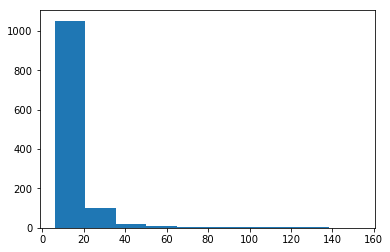

In [188]:
degrees = sorted(G.degree().values())
(v, e, p) = plt.hist(degrees)

Comments:

The Barabasi-Albert *preferential attachment* mechanism was changed from operating with knowledge of each node's degree (and calculating the collection of probabilities based on such knowledge), to randomly selecting an edge from all existing edges on each iteration of adding a node, and then randomly choosing one of the nodes connected by that edge, and connecting the new node to that edge. This implementation produced the same results as before. We see similar average shortest path length, and average clustering coefficient; and the histogram of the degree distribution shows a Power-Law distribution.